In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import integrate

In [17]:
newparams = {'figure.figsize': (18, 9), 'axes.grid': False,
             'lines.linewidth': 2,
             'font.size': 25, 'mathtext.fontset': 'stix',
             'font.family': 'STIXGeneral'}
plt.rcParams.update(newparams)

In [2]:
# paramtere
l = 1 # m
g = 9.8 # m/s^2
theta_0 = 0.2 # rad
theta_dot_0 = 0.0 # rad/s
q = 1 # s^-1
w_D = 3.13 # rad
drivkraft = 0.2 # s^-2

merk: Når drivkraften, $\omega_D$ er nær pendelens vinkelfrekvens, $\omega_0 = \sqrt{\frac{g}{l}}$, får vi resonans, som vi skal undersøke i oppgavene under.

## Oppgave 1
Bruk fjerdeordens Runge-Kutta (RK4) metoden for å løse bevegelsesligningen. Plot vinkelutslaget som funksjon av tid, opp til $t = 20s$. Bruk tidssteg $\Delta t = 0.01s$.

### Runge-Kutta Metoden
Hvor vi antar $sin(\theta) \approx \theta$

In [13]:
# tatt fra NumØving3
def equation(t, vals):
    theta, omega = vals
    d_theta_dt = omega
    d_omega_dt = drivkraft * math.sin(w_D * t) - q * omega - g/l * theta

    return np.array([d_theta_dt, d_omega_dt])

In [9]:
# tatt fra NumØving3 er RK4 gitt ved,
def RK4_step(RHS, vals, t, dt):
    """
    Calculates one step of the RK4-algorithm.
    
    RHS: (callable) function representing the right hand side of the differential equations
    vals: (numpy array) previous values of theta and omega, [theta, omega] 
    t: (float) previous time
    dt: (float) timestep
    
    return: (array) next values [theta_next, omega_next]
    """
    k1 = RHS(t, vals)
    k2 = RHS(t+dt/2, vals+(dt/2)*k1)
    k3 = RHS(t+dt/2, vals+(dt/2)*k2)
    k4 = RHS(t+dt, vals+dt*k3)
    return vals + (dt/6)*(k1 + (2*k2) + (2*k3) + k4)

def RK4_method(RHS, theta_0, theta_dot_0, dt, T):
    """
    Computes theta and w (omega).  
    
    Parameters
    -----------
    RHS: RHS of the differential equation 
    theta0: initial value of theta
    w0: initial value of omega
    dt: timestep
    T: max t
    
    return theta, w, t
    """

    t = np.arange(0, T, dt)
    vals = np.array([np.zeros_like(t), np.zeros_like(t)])
    vals[:,0] = np.array([theta_0, theta_dot_0])
    for i in range(len(t) - 1):
        vals[:,i+1] = RK4_step(RHS, vals[:,i], t[i], dt)
        
    theta = vals[0]
    w = vals[1]
    return theta, w, t

Plotter vi vinkelutslaget $\theta$, gitt $t = 20s$ og $\Delta t = 0.01$

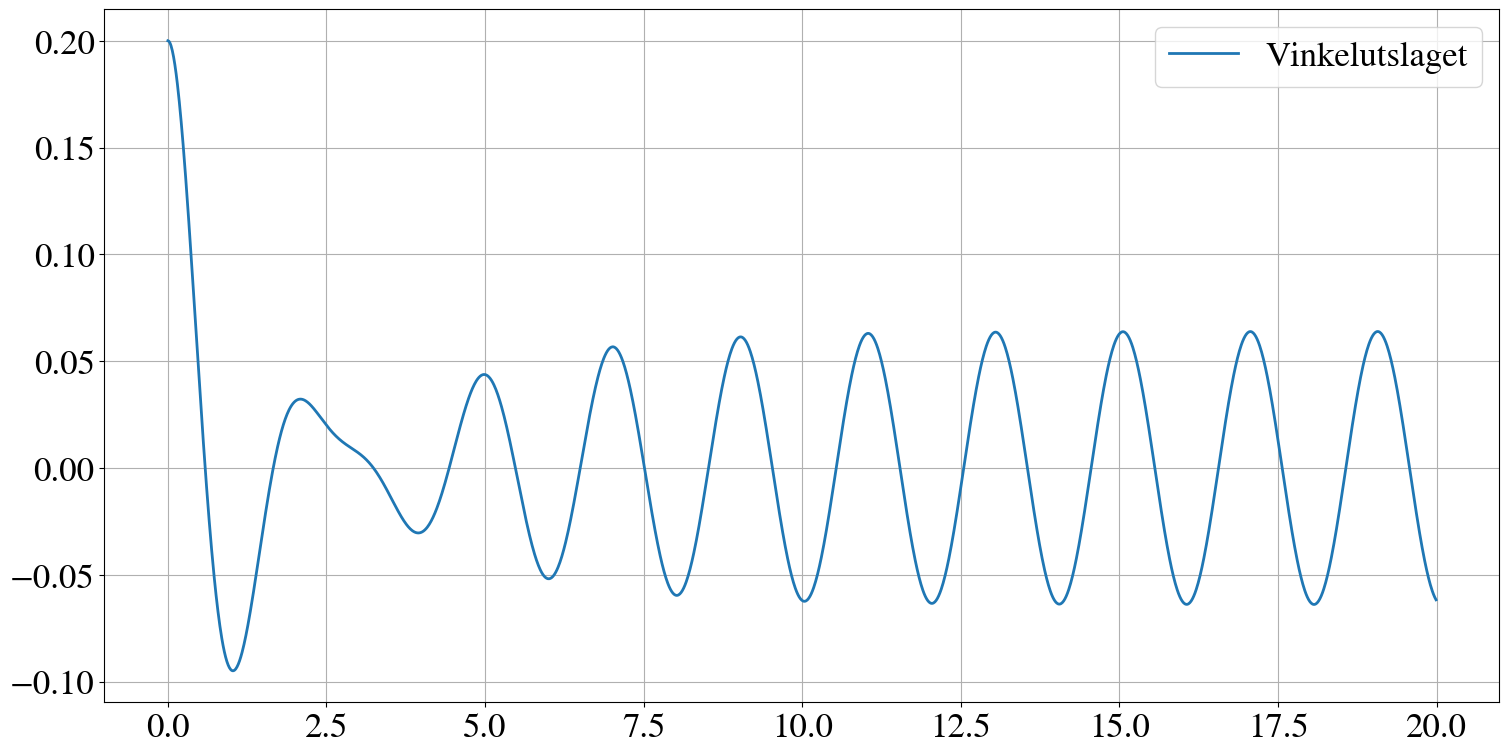

In [21]:
dt = 0.01
T = 20
theta,w, t = RK4_method(equation, theta_0, theta_dot_0, dt, T)
plt.plot(np.arange(0, T, dt), theta, label="Vinkelutslaget")
plt.legend()
plt.grid()
plt.show()

## Oppgave 2
Finn en passende steglengde, $\Delta t$, ved å utføre en konvergenstest av løsningen fra RK4-metoden. Utfør den samme konvergenstesten for Euler-Cromer metoden, som du også må implementere. Plot de to konvergenstestene i hver sin figur. Vurder ut fra konvergenstesten om tidssteget brukt i oppgave 1 var tilstrekkelig. Merk at energien ikke vil være bevart i dette systemet.

### Euler-Cromer metoden

In [6]:
# tatt fra NumØving3,
def euler_cromer_approx(theta_0, theta_dot_0, dt, T):
    """
    Calculates angular displacement and angular velocity 
    using the Euler-Cromer method 
    """
    N = int(T/dt)
    t = np.linspace(0, T, N + 1)
    theta, w = np.zeros(N+1), np.zeros(N+1)
    theta[0], w[0] = theta_0, theta_dot_0
    for i in range(N):
        w[i+1] = w[i] - g/l*theta[i]*dt
        theta[i+1] = theta[i] + w[i+1]*dt
    return theta, w, t


""" RK5(4) method """
def equation(t, vals):
    """
    Calculates the RHS of the differential equations given an array (vals) which contains the parameters

    Parameters
    -----------
    t: (float) time
    vals: (array) values of theta and omega, [theta, omega] 
    
    Returns
    -------
    array with values of the RHS of the equations.
    """
    dw = -g/l*vals[0]
    dtheta = vals[1]
    return np.array([dtheta, dw])

def RK45_method(RHS, theta_0, theta_dot_0, dt, T):
    """
    Calculates the angular dispacement and angular velocity.
    Note that the parameter RHS is a function representing the right hand side of the differential equations
    """
    init_values = [theta_0, theta_dot_0]
    t_span = [0, T + dt]
    theta12 = integrate.solve_ivp(RHS, t_span, init_values, method = 'RK45', max_step = dt)
    theta = theta12.y[0, :]  # Array of angular displacements
    w = theta12.y[1, :]      # Array of angular velocities 
    t = theta12.t            # Array of times
    return theta, w, t 

For å finne $\Delta t$ tar vi å å itererer over 100 løsninger for $\Delta E$ gitt $\Delta t = [0.01, 0.1]$ deretter  